** 스마트워치 센서 데이터 기반 행동 분류 3일차 **
# --------- 과제6 : 행동 추론 ---------

### [미션0] 과제 이해하기
   * 단말기 개발팀에서 새로 출시하는 Fine-Watch에 헬스케어 기능을 추가 할 수있도록, Fine-Watch에서 수집하는 데이터를 분석해 행동을 분류할 수 있는 AI 모델과 중요 feature list를 전달해야 합니다.
   * all 데이터셋에서 6가지 행동분류 중 'WALKING_UPSTAIRS'를 분류하는 모델을 만들고 정확도 도출해 보세요.
   * 마지막으로 누적된 모델의 정확도(result)와 'WALKING_UPSTAIRS' 행동분류에 중요하게 작용하는 Feature 5개를 개발팀으로 전달해 주세요.
   

※ 과제완수 조건: Fine-Watch에 헬스케어 기능 추가를 위해 'WALKING_UPSTAIRS' 행동을 분류할 수 있는 AI 모델을 만들고 모델의 정확도와 데이터를 시각화 하세요.

----------

### [미션1] 데이터 불러오기

* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 2일차에 생성한 파일들을 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 모델별 결과 불러오기 -> 중요 feature 불러오기 -> test_data 불러오기 -> train_data 불러오기 -> 데이터 합치기 -> 데이터 인덱스 초기화 하기 -> X, Y 데이터 나누기 -> 학습 데이터 나누기

In [100]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출

# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용

# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용

# XGBClassifier 알고리즘 사용을 위한 모듈 호출

# 진척도 상황을 확인하기 위한 tqdm 라이브러리 호출

# 저장한 모델 사용을 위한 joblib 라이브러리 호출

## 그외 라이브러리는 필요에 따라 호출해서 사용하세요.

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from tqdm import tqdm

from xgboost import XGBClassifier

import joblib


In [101]:
# 모델별 결과 불러오기
## 모델별 정확도를 비교 할 수 있도록 결과 저장 파일을 불러 옵니다.
## 'data' 폴더에서 /result5.csv 파일을 불러와 result 변수에 할당 합니다.
## result 변수에 할당이 잘 되었는지 확인해 주세요. 

result = pd.read_csv('./data/result5.csv')
result

model_name valid_data  accuracy_score  f1_score
0                 svc      train        0.942776  0.945949
1                  lr      train        0.980170  0.981491
2                 knn      train        0.942776  0.963997
3                 gbc      train        0.980737  0.982430
4                 xgb      train        0.987535  0.988406
5             hpt_xgb      train        0.992068  0.992707
6         hpt_xgb_150      train        0.989235  0.989286
7          hpt_xgb_50      train        0.988102  0.988090
8             hpt_xgb      train        0.992635  0.993037
9    test_hpt_xgb_top       test        0.989123  0.989604
10        all_hpt_xgb       test        0.989574  0.990426
11  all_hpt_depth_xgb       test        0.990481  0.991441

In [102]:
# 중요 feature 불러오기
## 모델 정확도에 높은 영향을 미치는 feature 이름을 저장한 importance_top.pkl 파일을 불러와 importance_top에 저장 합니다.
## importance_top 변수에 할당이 잘 되었는지 확인해 주세요. 

import joblib 

importance_top = joblib.load('importance_top.pkl')
importance_top

0              angle(X,gravityMean)
1      fBodyGyro-bandsEnergy()-1,24
2            tGravityAcc-energy()-X
3      fBodyAcc-bandsEnergy()-1,8.2
4             fBodyAcc-skewness()-X
                   ...             
142          tBodyGyroJerk-mean()-X
143    fBodyAcc-bandsEnergy()-17,24
144               tBodyGyro-min()-Z
145              tBodyGyroMag-iqr()
146               tBodyGyro-std()-Y
Name: feature_name, Length: 147, dtype: object

In [103]:
# test 데이터 불러오기
## 'data' 폴더에서 test_data.csv 파일을 불러와서 test_data 변수에 할당해 주세요.
## 잘 할당 되었는지 데이터를 확인해 주세요.

test_data = pd.read_csv('./data/test_data.csv')

test_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.284379          -0.021981          -0.116683   
1              0.277440          -0.028086          -0.118412   
2              0.305833          -0.041023          -0.087303   
3              0.276053          -0.016487          -0.108381   
4              0.271998           0.016904          -0.078856   
...                 ...                ...                ...   
1466           0.278725          -0.015262          -0.106398   
1467           0.275803          -0.019257          -0.109078   
1468           0.240402           0.006361          -0.121377   
1469           0.135873          -0.020675          -0.116644   
1470           0.241563          -0.020145          -0.083858   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.992490         -0.979640         -0.963321         -0.992563   
1            -0.996620         -0.927676         -0.972294         -0.997346   
2             0.006880          0.182800         -0.237984          0.005642   
3            -0.995379         -0.983978         -0.975854         -0.995877   
4            -0.973468         -0.702462         -0.869450         -0.979810   
...                ...               ...               ...               ...   
1466         -0.993625         -0.982845         -0.974745         -0.993963   
1467         -0.998614         -0.991621         -0.987403         -0.998813   
1468         -0.045805          0.189930          0.332664         -0.114706   
1469         -0.960526         -0.955134         -0.985818         -0.963115   
1470          0.410202          0.260990         -0.272913          0.345287   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.977304         -0.958142         -0.938850  ...   
1            -0.931405         -0.971788         -0.939837  ...   
2             0.028616         -0.236474          0.016311  ...   
3            -0.985280         -0.974907         -0.941425  ...   
4            -0.711601         -0.856807         -0.920760  ...   
...                ...               ...               ...  ...   
1466         -0.981100         -0.974596         -0.939303  ...   
1467         -0.991503         -0.986802         -0.945442  ...   
1468          0.157771          0.195271          0.210139  ...   
1469         -0.971338         -0.988261         -0.946289  ...   
1470          0.196325         -0.300247          0.622167  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.850065                    -0.018043   
1                           -0.613367                    -0.022456   
2                            0.394388                    -0.362616   
3                           -0.841455                     0.289548   
4                            0.214219                     0.010111   
...                               ...                          ...   
1466                        -0.874066                    -0.054788   
1467                        -0.721050                     0.076333   
1468                        -0.615554                     0.330378   
1469                        -0.422383                    -0.048474   
1470                        -0.843214                     0.374865   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.092304                          0.074220   
1                                -0.155414                          0.247498   
2                                 0.171069                          0.576349   
3                                 0.079801                         -0.020033   
4                                 0.114179                         -0.830776   
...                                    ...                               ...   
1466                              0.712975                

In [104]:
# train 데이터 불러오기
## 'data' 폴더에서 train_data.csv 파일을 불러와서 train_data 변수에 할당해 주세요.
## 잘 할당 되었는지 데이터를 확인해 주세요.

train_data = pd.read_csv("./data/train_data.csv")
train_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288508          -0.009196          -0.103362   
1              0.265757          -0.016576          -0.098163   
2              0.278709          -0.014511          -0.108717   
3              0.289795          -0.035536          -0.150354   
4              0.394807           0.034098           0.091229   
...                 ...                ...                ...   
5876           0.277194          -0.012389          -0.131974   
5877           0.191568           0.013328          -0.105174   
5878           0.267981          -0.018348          -0.107440   
5879           0.212787          -0.048130          -0.121001   
5880           0.283815          -0.040658          -0.138018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.988986         -0.962797         -0.967422         -0.989000   
1            -0.989551         -0.994636         -0.987435         -0.990189   
2            -0.997720         -0.981088         -0.994008         -0.997934   
3            -0.231727         -0.006412         -0.338117         -0.273557   
4             0.088489         -0.106636         -0.388502         -0.010469   
...                ...               ...               ...               ...   
5876         -0.994046         -0.940578         -0.917337         -0.994261   
5877         -0.126969         -0.121729         -0.327480         -0.192523   
5878         -0.991303         -0.989881         -0.990313         -0.992386   
5879         -0.041373          0.052449         -0.585361         -0.100714   
5880         -0.992662         -0.747190         -0.920248         -0.993410   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.962596         -0.965650         -0.929747  ...   
1            -0.993870         -0.987558         -0.937337  ...   
2            -0.982187         -0.995017         -0.942584  ...   
3             0.014245         -0.347916          0.008288  ...   
4            -0.109680         -0.346372          0.584131  ...   
...                ...               ...               ...  ...   
5876         -0.932830         -0.908088         -0.936219  ...   
5877         -0.109923         -0.295286          0.078644  ...   
5878         -0.988852         -0.991237         -0.936099  ...   
5879          0.023353         -0.554707          0.219814  ...   
5880         -0.768055         -0.924587         -0.935871  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.816696                    -0.042494   
1                           -0.693515                    -0.062899   
2                           -0.829311                     0.000265   
3                           -0.408956                    -0.255125   
4                           -0.563437                    -0.044344   
...                               ...                          ...   
5876                        -0.690363                    -0.034888   
5877                        -0.879215                     0.721718   
5878                        -0.886851                     0.060173   
5879                        -0.053556                     0.260880   
5880                        -0.696584                     0.107690   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                -0.044218                          0.307873   
1                                 0.388459                         -0.765014   
2                                -0.525022                         -0.891875   
3                                 0.612804                          0.747381   
4                                -0.845268                         -0.974650   
...                                    ...                               ...   
5876                             -0.261437                

In [105]:
# 데이터 합치기
## all_data 변수에 train 데이터셋과 test 데이터셋을 위/아래로 합쳐서 할당 합니다.

all_data = pd.concat( [train_data, test_data], axis=0     )

all_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288508          -0.009196          -0.103362   
1              0.265757          -0.016576          -0.098163   
2              0.278709          -0.014511          -0.108717   
3              0.289795          -0.035536          -0.150354   
4              0.394807           0.034098           0.091229   
...                 ...                ...                ...   
1466           0.278725          -0.015262          -0.106398   
1467           0.275803          -0.019257          -0.109078   
1468           0.240402           0.006361          -0.121377   
1469           0.135873          -0.020675          -0.116644   
1470           0.241563          -0.020145          -0.083858   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.988986         -0.962797         -0.967422         -0.989000   
1            -0.989551         -0.994636         -0.987435         -0.990189   
2            -0.997720         -0.981088         -0.994008         -0.997934   
3            -0.231727         -0.006412         -0.338117         -0.273557   
4             0.088489         -0.106636         -0.388502         -0.010469   
...                ...               ...               ...               ...   
1466         -0.993625         -0.982845         -0.974745         -0.993963   
1467         -0.998614         -0.991621         -0.987403         -0.998813   
1468         -0.045805          0.189930          0.332664         -0.114706   
1469         -0.960526         -0.955134         -0.985818         -0.963115   
1470          0.410202          0.260990         -0.272913          0.345287   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.962596         -0.965650         -0.929747  ...   
1            -0.993870         -0.987558         -0.937337  ...   
2            -0.982187         -0.995017         -0.942584  ...   
3             0.014245         -0.347916          0.008288  ...   
4            -0.109680         -0.346372          0.584131  ...   
...                ...               ...               ...  ...   
1466         -0.981100         -0.974596         -0.939303  ...   
1467         -0.991503         -0.986802         -0.945442  ...   
1468          0.157771          0.195271          0.210139  ...   
1469         -0.971338         -0.988261         -0.946289  ...   
1470          0.196325         -0.300247          0.622167  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.816696                    -0.042494   
1                           -0.693515                    -0.062899   
2                           -0.829311                     0.000265   
3                           -0.408956                    -0.255125   
4                           -0.563437                    -0.044344   
...                               ...                          ...   
1466                        -0.874066                    -0.054788   
1467                        -0.721050                     0.076333   
1468                        -0.615554                     0.330378   
1469                        -0.422383                    -0.048474   
1470                        -0.843214                     0.374865   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                -0.044218                          0.307873   
1                                 0.388459                         -0.765014   
2                                -0.525022                         -0.891875   
3                                 0.612804                          0.747381   
4                                -0.845268                         -0.974650   
...                                    ...                               ...   
1466                              0.712975                

In [106]:
# 데이터 인덱스 초기화
## 데이터셋을 위아래로 합치면 인덱스 중복이 발생 합니다.
## 인덱스가 중복되지 않도록 인덱스를 리셋해 주세요.

all_data.reset_index(drop=True, inplace = True)
all_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288508          -0.009196          -0.103362   
1              0.265757          -0.016576          -0.098163   
2              0.278709          -0.014511          -0.108717   
3              0.289795          -0.035536          -0.150354   
4              0.394807           0.034098           0.091229   
...                 ...                ...                ...   
7347           0.278725          -0.015262          -0.106398   
7348           0.275803          -0.019257          -0.109078   
7349           0.240402           0.006361          -0.121377   
7350           0.135873          -0.020675          -0.116644   
7351           0.241563          -0.020145          -0.083858   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.988986         -0.962797         -0.967422         -0.989000   
1            -0.989551         -0.994636         -0.987435         -0.990189   
2            -0.997720         -0.981088         -0.994008         -0.997934   
3            -0.231727         -0.006412         -0.338117         -0.273557   
4             0.088489         -0.106636         -0.388502         -0.010469   
...                ...               ...               ...               ...   
7347         -0.993625         -0.982845         -0.974745         -0.993963   
7348         -0.998614         -0.991621         -0.987403         -0.998813   
7349         -0.045805          0.189930          0.332664         -0.114706   
7350         -0.960526         -0.955134         -0.985818         -0.963115   
7351          0.410202          0.260990         -0.272913          0.345287   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.962596         -0.965650         -0.929747  ...   
1            -0.993870         -0.987558         -0.937337  ...   
2            -0.982187         -0.995017         -0.942584  ...   
3             0.014245         -0.347916          0.008288  ...   
4            -0.109680         -0.346372          0.584131  ...   
...                ...               ...               ...  ...   
7347         -0.981100         -0.974596         -0.939303  ...   
7348         -0.991503         -0.986802         -0.945442  ...   
7349          0.157771          0.195271          0.210139  ...   
7350         -0.971338         -0.988261         -0.946289  ...   
7351          0.196325         -0.300247          0.622167  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.816696                    -0.042494   
1                           -0.693515                    -0.062899   
2                           -0.829311                     0.000265   
3                           -0.408956                    -0.255125   
4                           -0.563437                    -0.044344   
...                               ...                          ...   
7347                        -0.874066                    -0.054788   
7348                        -0.721050                     0.076333   
7349                        -0.615554                     0.330378   
7350                        -0.422383                    -0.048474   
7351                        -0.843214                     0.374865   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                -0.044218                          0.307873   
1                                 0.388459                         -0.765014   
2                                -0.525022                         -0.891875   
3                                 0.612804                          0.747381   
4                                -0.845268                         -0.974650   
...                                    ...                               ...   
7347                              0.712975                

### [미션2] 'WALKING_UPSTAIRS' 행동분류에 영향을 미치는 중요 feature 도출


* 개발팀에서 'WALKING_UPSTAIRS' 행동분류 기능을 개발할 수 있도록 데이터에서 특히 'WALKING_UPSTAIRS' 행동분류에만 영향을 많이 미치는 중요 feature 를 찾아주세요.


	- 실습순서: X, Y 데이터 나누기-> 학습 데이터 나누기 -> AI 모델링 및 결과 예측 -> 모델 성능 평가 -> 예측 결과 저장


In [107]:
# X, Y 데이터 나누기

## 모델 학습을 위해 feature(X) 데이터와 target(Y) 데이터를 나누어 주어야 합니다.

## target(Y)을 분리를 위해 all_data['Activity'] 값을 숫자로 변환 할 때 'WALKING_UPSTAIRS' 만 인식 할 수 있도록 숫자를 구성해야 합니다.

## [TIP]: {'STANDING':0, 'SITTING':0, 'LAYING':0, 'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':0}

## 변환된 결과를 all_y_map 변수에 할당 합니다. 

## all_data 데이터에서 2일차에서 선정한 중요도가 높은 feature 들만 골라 all_x 변수에 할당 합니다.

## 중요도가 높은 feature 들의 이름은 .pkl 파일에서 불러와 importance_top 변수에 저장되어 있습니다.

all_y_map =  all_data['Activity'].map({'STANDING':0, 'SITTING':0, 'LAYING':0, 'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':0})

all_x = all_data[importance_top]

all_x

all_y_map

0       0
1       0
2       0
3       0
4       0
       ..
7347    0
7348    0
7349    0
7350    0
7351    0
Name: Activity, Length: 7352, dtype: int64

In [108]:
# 학습 데이터 나누기

## 학습에 필요한 all_x 와 all_y_map 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.

## 이때 random_state 는 2023 으로 설정해 주세요.

## 데이터를 할당받을 변수명: all_x_train, all_x_val, all_y_train, all_y_val

from sklearn.model_selection import train_test_split

all_x_train, all_x_val, all_y_train, all_y_val = train_test_split(all_x, all_y_map , test_size=0.3, random_state=2023)

##### walkingup_model

In [109]:
# AI 모델링 및 결과 예측

## XGBClassifier 알고리즘을 사용하여 walkingup_model 변수에 모델을 생성 및 초기화 합니다.

## 파라미터는 최종 조정 파라미터를 사용하고, random_state는 2023 으로 설정해 주세요.

## 모델이 생성되면 all_x_train, all_y_train 로 모델을 학습시켜 줍니다.

## 모델 학습이 완료되면 all_x_val 데이터의 결과를 예측하여 walkingup_pred 변수에 할당 합니다.

walkingup_model = XGBClassifier(learning_rate= 0.3, max_depth= 4, random_state=2023)

walkingup_model.fit(all_x_train, all_y_train)

walkingup_pred = walkingup_model.predict(all_x_val)

walkingup_pred

array([0, 0, 0, ..., 0, 1, 0])

In [110]:
print(walkingup_pred.shape)

(2206,)


In [140]:
print(all_x_val.shape)

(2206, 147)


In [111]:
print(all_y_val.shape)

(2206,)


In [112]:
# walkingup_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print("accuracy_score(all_y_val, all_hpt_xgb_model_pred):",accuracy_score(all_y_val, walkingup_pred))

print("confusion_matrix(all_y_val, all_hpt_xgb_model_pred):\n",confusion_matrix(all_y_val,walkingup_pred))

print("classification_report(all_y_val, all_hpt_xgb_model_pred):\n",classification_report(all_y_val,walkingup_pred))

accuracy_score(all_y_val, all_hpt_xgb_model_pred): 0.9981867633726201
confusion_matrix(all_y_val, all_hpt_xgb_model_pred):
 [[1885    1]
 [   3  317]]
classification_report(all_y_val, all_hpt_xgb_model_pred):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       1.00      0.99      0.99       320

    accuracy                           1.00      2206
   macro avg       1.00      1.00      1.00      2206
weighted avg       1.00      1.00      1.00      2206



In [113]:
# walkingup_xgb_model 예측결과 저장
## result 데이터프레임 12번 인덱스에 'walkingup_xgb'(모델명), 'all'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[12] = ["walkingup_xgb_model","all", accuracy_score(all_y_val,walkingup_pred), f1_score(all_y_val,walkingup_pred, average='macro')]

result

model_name valid_data  accuracy_score  f1_score
0                   svc      train        0.942776  0.945949
1                    lr      train        0.980170  0.981491
2                   knn      train        0.942776  0.963997
3                   gbc      train        0.980737  0.982430
4                   xgb      train        0.987535  0.988406
5               hpt_xgb      train        0.992068  0.992707
6           hpt_xgb_150      train        0.989235  0.989286
7            hpt_xgb_50      train        0.988102  0.988090
8               hpt_xgb      train        0.992635  0.993037
9      test_hpt_xgb_top       test        0.989123  0.989604
10          all_hpt_xgb       test        0.989574  0.990426
11    all_hpt_depth_xgb       test        0.990481  0.991441
12  walkingup_xgb_model        all        0.998187  0.996335

### [미션3] 'WORKING_UPSTAIRS' 행동분류 모델 개선
* feature selection 기법을 상용하여 'WORKING_UPSTAIRS' 행동분류 모델의 정확도를 개선해 주세요.

	- 실습순서: feature 명 데이터 파일 생성 -> 데이터 분할/가공 -> 최적의 Feature Selection 찾기 -> 상위 5개 feature 데이터 시각화 -> 센서별 중요도 시각화 

In [114]:
# feature 명 데이터 파일 생성

## up_importance_sort 데이터프레임 변수를 생성 및 초기화 합니다.

up_importance_sort = pd.DataFrame()
up_importance_sort

Empty DataFrame
Columns: []
Index: []

In [115]:
all_x.columns

Index(['angle(X,gravityMean)', 'fBodyGyro-bandsEnergy()-1,24',
       'tGravityAcc-energy()-X', 'fBodyAcc-bandsEnergy()-1,8.2',
       'fBodyAcc-skewness()-X', 'fBodyAccMag-std()', 'angle(Y,gravityMean)',
       'fBodyAccMag-mad()', 'tBodyAccMag-std()', 'fBodyBodyAccJerkMag-max()',
       ...
       'tBodyGyroMag-min()', 'fBodyAccJerk-skewness()-X',
       'fBodyAcc-bandsEnergy()-1,8.1', 'tBodyGyroJerk-iqr()-X',
       'fBodyAcc-maxInds-X', 'tBodyGyroJerk-mean()-X',
       'fBodyAcc-bandsEnergy()-17,24', 'tBodyGyro-min()-Z',
       'tBodyGyroMag-iqr()', 'tBodyGyro-std()-Y'],
      dtype='object', length=147)

In [116]:
# feature 명 할당
## up_importance_sort['feature_name'] 열에 walkingup_model 학습에 사용한 all_x 데이터프레임의 모든 feature 명을 할당 합니다.

up_importance_sort['feature_name'] = all_x.columns

In [117]:
walkingup_model.feature_importances_

array([0.00000000e+00, 9.09036549e-04, 0.00000000e+00, 2.11058870e-01,
       1.01237209e-04, 5.65422047e-03, 1.11002950e-02, 4.72023292e-03,
       3.47842239e-02, 1.40871257e-02, 6.27488317e-03, 0.00000000e+00,
       0.00000000e+00, 3.38283204e-03, 2.04874249e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.96598989e-05, 1.71505468e-04,
       7.23620178e-03, 3.23436260e-02, 1.36859380e-02, 8.73029057e-05,
       0.00000000e+00, 3.12046371e-02, 1.03940030e-04, 0.00000000e+00,
       8.37411731e-02, 0.00000000e+00, 2.65951511e-02, 2.71717249e-03,
       2.94697341e-02, 1.13755593e-03, 9.63012644e-05, 1.43482676e-02,
       2.96913297e-03, 0.00000000e+00, 9.27763060e-04, 1.71881620e-04,
       1.95282092e-03, 9.80062503e-03, 2.31252369e-02, 3.27134767e-04,
       0.00000000e+00, 1.30272383e-04, 0.00000000e+00, 0.00000000e+00,
       2.28322335e-02, 1.61997756e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.04649831e-04, 1.62400989e-04,
      

In [118]:
# feature importances 할당
## up_importance_sort['feature_importance'] 열에 walkingup_model 모델의 feature_importances 를 할당해 줍니다.
## 참고함수: feature_importances_

In [119]:
up_importance_sort['feature_importance'] = walkingup_model.feature_importances_
up_importance_sort

feature_name  feature_importance
0            angle(X,gravityMean)            0.000000
1    fBodyGyro-bandsEnergy()-1,24            0.000909
2          tGravityAcc-energy()-X            0.000000
3    fBodyAcc-bandsEnergy()-1,8.2            0.211059
4           fBodyAcc-skewness()-X            0.000101
..                            ...                 ...
142        tBodyGyroJerk-mean()-X            0.000000
143  fBodyAcc-bandsEnergy()-17,24            0.000182
144             tBodyGyro-min()-Z            0.000000
145            tBodyGyroMag-iqr()            0.000000
146             tBodyGyro-std()-Y            0.002210

[147 rows x 2 columns]

In [120]:
# 중요도 순으로 인덱스 재 정렬

## up_importance_sort 데이터프레임을 up_importance_sort['feature_importance'] 순으로 내림차순 정열 합니다.

## 정렬 후 결과를 확인 합니다.

up_importance_sort.sort_values('feature_importance', ascending=False, inplace =True)
up_importance_sort

feature_name  feature_importance
3       fBodyAcc-bandsEnergy()-1,8.2            0.211059
68            fBodyBodyGyroMag-std()            0.106188
67         tGravityAcc-arCoeff()-Z,2            0.102537
28         tGravityAcc-arCoeff()-Z,1            0.083741
8                  tBodyAccMag-std()            0.034784
..                               ...                 ...
74                 tBodyAccMag-max()            0.000000
72  fBodyAccJerk-bandsEnergy()-25,32            0.000000
69    fBodyGyro-bandsEnergy()-9,16.2            0.000000
64    fBodyAccJerk-bandsEnergy()-1,8            0.000000
73               tGravityAcc-std()-Y            0.000000

[147 rows x 2 columns]

In [121]:
# 데이터 인덱스 초기화
## 인덱스가 순서대로 나열 되도록 인덱스를 리셋해 주세요.

up_importance_sort.reset_index(drop=True, inplace=True)
up_importance_sort

feature_name  feature_importance
0        fBodyAcc-bandsEnergy()-1,8.2            0.211059
1              fBodyBodyGyroMag-std()            0.106188
2           tGravityAcc-arCoeff()-Z,2            0.102537
3           tGravityAcc-arCoeff()-Z,1            0.083741
4                   tBodyAccMag-std()            0.034784
..                                ...                 ...
142                 tBodyAccMag-max()            0.000000
143  fBodyAccJerk-bandsEnergy()-25,32            0.000000
144    fBodyGyro-bandsEnergy()-9,16.2            0.000000
145    fBodyAccJerk-bandsEnergy()-1,8            0.000000
146               tGravityAcc-std()-Y            0.000000

[147 rows x 2 columns]

In [122]:
all_y_val

1167    0
4533    0
1146    0
3201    0
6263    0
       ..
3979    0
6536    0
4801    0
2284    1
894     0
Name: Activity, Length: 2206, dtype: int64

In [123]:
# 최적의 Feature Selection 찾기

## acc 데이터 프레임을 생성 및 초기화 합니다.(컬럼 지정: columns=['accuracy_score'])

## 전체 feature는 561개에서 도출한 Top feature 개수를(예: 141개) 선별 했기에 feature를 1개 ~ Top feature 개수까지 모델링과 결과를 도출 합니다.

## for 문을 사용해 중요도 상위 feature 1개 모델링부터 Top feature 개수까지 순차적 모델링 실행 후 각 accuracy_score 결과를 acc 변수에 누적 합니다.

## [TIP] tqdm: tqdm은 반복문에서 현재 계산되고 있는 부분의 퍼센테이지를 시각적으로 나태내어 줍니다.

## [TIP] tqdm 사용 예제: for i in range(10) -> for i in tqdm(range(10)):
 
acc = pd.DataFrame(columns=['accuracy_score'])
    
for i in tqdm(range( 142 )):

    # 0으로 시작, 0이 들어가면 -1, 따라서 출력 값이 없다.
    importance_n = up_importance_sort['feature_name'][:i+1]

    x_train_n =  all_x_train[importance_n]
    x_val_n =   all_x_val[importance_n]

    xgb_n_model = XGBClassifier(learning_rate= 0.3, max_depth= 4, random_state=2023)
    xgb_n_model.fit(x_train_n, all_y_train)
    xgb_n_pred = xgb_n_model.predict(x_val_n)
    
    # 얘한테는 0부터 들어가야 한다. 얘는 0부터 채워진다.
    acc.loc[i] = accuracy_score(  all_y_val ,xgb_n_pred  )

acc

# all_x_train, all_x_val, all_y_train, all_y_val

100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [00:51<00:00,  2.77it/s]


accuracy_score
0          0.862194
1          0.880780
2          0.944243
3          0.941523
4          0.959202
..              ...
137        0.999093
138        0.999093
139        0.999093
140        0.999093
141        0.999093

[142 rows x 1 columns]

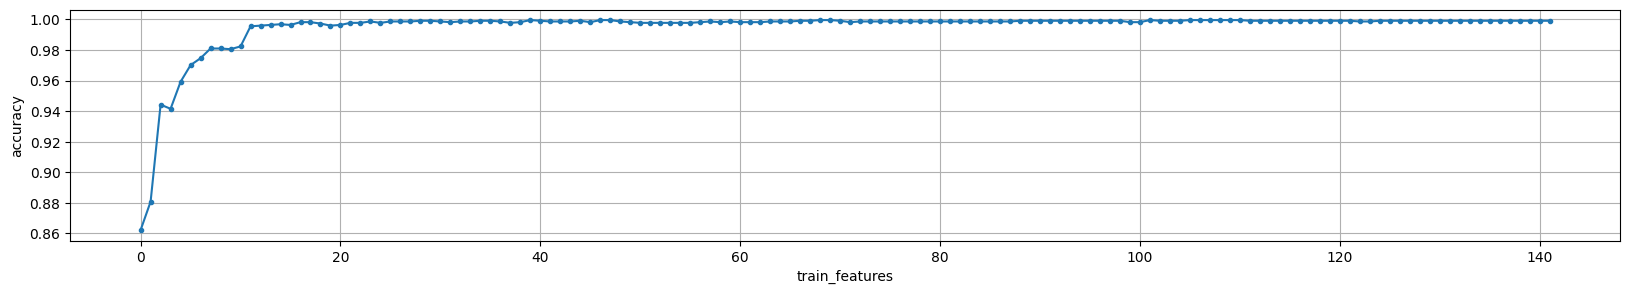

In [124]:
# accuracy_score 누적 결과 시각화
## accuracy_score 누적한 acc 변수를 plot으로 시각화 합니다.

plt.figure( figsize= (20,3))
plt.plot(acc['accuracy_score'], marker ='.' )
plt.xlabel('train_features')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [125]:
# 최고 정확도 Feature 개수 찾기
## acc 변수를 accuracy_score 기준 내림차순으로 정렬 합니다.(인덱스 재설정X)
## 인덱스 번호는 누적 학습된 feature의 개수 입니다.
## accuracy_score 값으로 내림차순 정렬 후 이 가장 첫번째 행의 인덱스 번호가 가장 정확도가 좋은 feature 개수를 뜻합니다.

acc.sort_values('accuracy_score', ascending = False, inplace = True)
acc

accuracy_score
101        0.999547
110        0.999547
106        0.999547
68         0.999547
69         0.999547
..              ...
4          0.959202
2          0.944243
3          0.941523
1          0.880780
0          0.862194

[142 rows x 1 columns]

In [126]:
# 최고 정확도 Feature명 저장

## acc 결과에서 확인한 가장 성능좋은 결과를 내는 feature의 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 

## feature의 이름을 up_importance_top 변수에 할당 합니다.

## 정확도 최고치 인덱스 값 +1 해서 슬라이싱 하세요

## [TIP] 슬라이싱 할때 [:1] -> feature 0번 까지 짤림, [:100] -> feature 99번 까지 짤림

up_importance_top = up_importance_sort['feature_name'][0:101+1]
up_importance_top

0      fBodyAcc-bandsEnergy()-1,8.2
1            fBodyBodyGyroMag-std()
2         tGravityAcc-arCoeff()-Z,2
3         tGravityAcc-arCoeff()-Z,1
4                 tBodyAccMag-std()
                   ...             
97                tBodyGyro-iqr()-X
98               tBodyGyroMag-iqr()
99     fBodyGyro-bandsEnergy()-9,16
100               tBodyGyro-min()-Z
101     tBodyGyroJerk-arCoeff()-X,3
Name: feature_name, Length: 102, dtype: object

In [127]:
up_importance_top

0      fBodyAcc-bandsEnergy()-1,8.2
1            fBodyBodyGyroMag-std()
2         tGravityAcc-arCoeff()-Z,2
3         tGravityAcc-arCoeff()-Z,1
4                 tBodyAccMag-std()
                   ...             
97                tBodyGyro-iqr()-X
98               tBodyGyroMag-iqr()
99     fBodyGyro-bandsEnergy()-9,16
100               tBodyGyro-min()-Z
101     tBodyGyroJerk-arCoeff()-X,3
Name: feature_name, Length: 102, dtype: object

In [141]:
# 훈련 데이터 생성

## all_x_train 데이터에서 위에서 up_importance_top에 할당한 feature 들의 데이터를 x_train_top 변수에 할당해 줍니다.

## all_x_val 데이터에서 위에서 up_importance_top에 할당한 feature 들의 데이터를 x_val_top 변수에 할당해 줍니다.

x_train_top = all_x_train[up_importance_top]

x_val_top = all_x_val[up_importance_top]


In [142]:
x_train_top.shape

(5146, 102)

In [143]:
all_y_train.shape

(5146,)

In [144]:
x_val_top.shape

(2206, 102)

In [145]:
all_y_val.shape

(2206,)

In [146]:
# AI 모델링 및 결과 예측

## XGBClassifier 알고리즘을 사용하여 walkingup_top_model 변수에 모델을 생성 및 초기화 합니다.

## 파라미터는 최종 조정 파라미터를 사용하고, random_state는 2023 으로 설정해 주세요.

## 모델이 생성되면 all_x_train_top, all_y_train 로 모델을 학습시켜 줍니다.

## 모델 학습이 완료되면 all_x_val_top 데이터의 결과를 예측하여 walkingup_pred 변수에 할당 합니다.

walkingup_top_model = XGBClassifier(learning_rate= 0.3, max_depth= 4, random_state=2023)

walkingup_top_model.fit(x_train_top, all_y_train)

walkingup_pred = walkingup_top_model.predict(x_val_top)

walkingup_pred

array([0, 0, 0, ..., 0, 1, 0])

In [147]:
walkingup_pred.shape

(2206,)

In [148]:
all_y_val.shape

(2206,)

In [149]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print("accuracy_score(all_y_val, all_hpt_xgb_model_pred):", accuracy_score(all_y_val, walkingup_pred) )

print("confusion_matrix(all_y_val, all_hpt_xgb_model_pred):\n",confusion_matrix(all_y_val,walkingup_pred))

print("classification_report(all_y_val, all_hpt_xgb_model_pred):\n",classification_report(all_y_val,walkingup_pred))

accuracy_score(all_y_val, all_hpt_xgb_model_pred): 0.9995466908431551
confusion_matrix(all_y_val, all_hpt_xgb_model_pred):
 [[1885    1]
 [   0  320]]
classification_report(all_y_val, all_hpt_xgb_model_pred):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       1.00      1.00      1.00       320

    accuracy                           1.00      2206
   macro avg       1.00      1.00      1.00      2206
weighted avg       1.00      1.00      1.00      2206



In [150]:
# walkingup_top_model 예측결과 저장
## result 데이터프레임 13번 인덱스에 'walkingup_top'(모델명), 'all'(검증 데이터명), accuracy_score 결과, f1_score 결과 를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[13] = ["walkingup_xgb_model","all", accuracy_score(all_y_val, walkingup_pred), f1_score(all_y_val, walkingup_pred, average='macro')]

result

model_name valid_data  accuracy_score  f1_score
0                   svc      train        0.942776  0.945949
1                    lr      train        0.980170  0.981491
2                   knn      train        0.942776  0.963997
3                   gbc      train        0.980737  0.982430
4                   xgb      train        0.987535  0.988406
5               hpt_xgb      train        0.992068  0.992707
6           hpt_xgb_150      train        0.989235  0.989286
7            hpt_xgb_50      train        0.988102  0.988090
8               hpt_xgb      train        0.992635  0.993037
9      test_hpt_xgb_top       test        0.989123  0.989604
10          all_hpt_xgb       test        0.989574  0.990426
11    all_hpt_depth_xgb       test        0.990481  0.991441
12  walkingup_xgb_model        all        0.998187  0.996335
13  walkingup_xgb_model        all        0.999547  0.999087

### [미션4] 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor' 찾기

* 'WORKING_UPSTAIRS' 분류에 가장 영향 많이 미치는 상위 20개의 sensor 그룹을 찾아 시각화 하세요

	- 실습순서: 그룹 데이터 불러오기 -> 데이터 프레임 merge 하기 -> 데이터 그룹화 ->  sensor 별 중요도 재정렬  -> sensor 별 중요도 시각화

In [154]:
# features.csv 파일 불러오기

## 'data'폴더에서 features.csv 파일을 읽어와 feature_group 변수에 할당 하세요.

## 변수에 할당이 잘 되었는지 확인해 주세요. 

feature_group = pd.read_csv("./data/features.csv")

feature_group

sensor                agg         axis  \
0    tBodyAcc             mean()            X   
1    tBodyAcc             mean()            Y   
2    tBodyAcc             mean()            Z   
3    tBodyAcc              std()            X   
4    tBodyAcc              std()            Y   
..        ...                ...          ...   
556     angle      tBodyGyroMean  gravityMean   
557     angle  tBodyGyroJerkMean  gravityMean   
558     angle                  X  gravityMean   
559     angle                  Y  gravityMean   
560     angle                  Z  gravityMean   

                             feature_name  
0                       tBodyAcc-mean()-X  
1                       tBodyAcc-mean()-Y  
2                       tBodyAcc-mean()-Z  
3                        tBodyAcc-std()-X  
4                        tBodyAcc-std()-Y  
..                                    ...  
556      angle(tBodyGyroMean,gravityMean)  
557  angle(tBodyGyroJerkMean,gravityMean)  
558                  angle(X,gravityMean)  
559                  angle(Y,gravityMean)  
560                  angle(Z,gravityMean)  

[561 rows x 4 columns]

In [155]:
pd.merge(feature_group,up_importance_sort,on='feature_name')

sensor         agg         axis  \
0                tBodyAcc       std()            X   
1                tBodyAcc       std()            Z   
2                tBodyAcc       mad()            Y   
3                tBodyAcc       mad()            Z   
4                tBodyAcc       max()            X   
..                    ...         ...          ...   
146      fBodyBodyGyroMag       min()          NaN   
147      fBodyBodyGyroMag  meanFreq()          NaN   
148  fBodyBodyGyroJerkMag       std()          NaN   
149                 angle           X  gravityMean   
150                 angle           Y  gravityMean   

                    feature_name  feature_importance  
0               tBodyAcc-std()-X            0.000000  
1               tBodyAcc-std()-Z            0.002002  
2               tBodyAcc-mad()-Y            0.000524  
3               tBodyAcc-mad()-Z            0.000000  
4               tBodyAcc-max()-X            0.014348  
..                           ...                 ...  
146       fBodyBodyGyroMag-min()            0.000000  
147  fBodyBodyGyroMag-meanFreq()            0.007991  
148   fBodyBodyGyroJerkMag-std()            0.000000  
149         angle(X,gravityMean)            0.000000  
150         angle(Y,gravityMean)            0.011100  

[151 rows x 5 columns]

In [156]:
# 데이터프레임 merge 

## merge_df 변수를 데이터프레임 타입으로 생성 및 초기화 합니다.

## feature_group 변수와 up_importance_sort 변수를 merge 하여 merge_df 할당 합니다.

## 데이터가 잘 할당 되었나 merge_df 데이터를 확인 합니다.

merge_df = pd.merge(feature_group,up_importance_sort,on='feature_name')

merge_df


sensor         agg         axis  \
0                tBodyAcc       std()            X   
1                tBodyAcc       std()            Z   
2                tBodyAcc       mad()            Y   
3                tBodyAcc       mad()            Z   
4                tBodyAcc       max()            X   
..                    ...         ...          ...   
146      fBodyBodyGyroMag       min()          NaN   
147      fBodyBodyGyroMag  meanFreq()          NaN   
148  fBodyBodyGyroJerkMag       std()          NaN   
149                 angle           X  gravityMean   
150                 angle           Y  gravityMean   

                    feature_name  feature_importance  
0               tBodyAcc-std()-X            0.000000  
1               tBodyAcc-std()-Z            0.002002  
2               tBodyAcc-mad()-Y            0.000524  
3               tBodyAcc-mad()-Z            0.000000  
4               tBodyAcc-max()-X            0.014348  
..                           ...                 ...  
146       fBodyBodyGyroMag-min()            0.000000  
147  fBodyBodyGyroMag-meanFreq()            0.007991  
148   fBodyBodyGyroJerkMag-std()            0.000000  
149         angle(X,gravityMean)            0.000000  
150         angle(Y,gravityMean)            0.011100  

[151 rows x 5 columns]

In [158]:
# 데이터 그룹화

## merge_df 변수를 'sensor' 기준으로 그룹화 하고 'feature_importance' 열의 데이터를 같은 'sensor' 그룹끼리 더해 줍니다.

## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 계산을 동시에 수행할 수 있습니다.

## [TIP] 변수.groupby(by='그룹기준열')['연산 할 열'].연산메서드()

sensor_sum = merge_df.groupby(by='sensor')['feature_importance'].sum()

In [159]:
sensor_sum

sensor
angle                   0.011100
fBodyAcc                0.294266
fBodyAccJerk            0.014747
fBodyAccMag             0.014587
fBodyBodyAccJerkMag     0.014087
fBodyBodyGyroJerkMag    0.000000
fBodyBodyGyroMag        0.114178
fBodyGyro               0.061973
tBodyAcc                0.030078
tBodyAccJerk            0.050689
tBodyAccJerkMag         0.001755
tBodyAccMag             0.036138
tBodyGyro               0.010541
tBodyGyroJerk           0.012350
tBodyGyroMag            0.000222
tGravityAcc             0.345433
Name: feature_importance, dtype: float32

In [36]:
# sensor 중요도 재 정렬
## sensor_sum 데이터를 내림차순으로 정렬 후 sensor_sort 변수에 할당합니다.
## sensor_sum 을 데이터프레임 으로 생성했을 경우 기준(by=)을 지정해 주어야 합니다.

sensor
tGravityAcc             0.436199
fBodyAcc                0.166977
fBodyAccJerk            0.126140
fBodyGyro               0.093512
tBodyGyro               0.055459
tBodyAcc                0.032077
fBodyBodyAccJerkMag     0.029448
fBodyAccMag             0.027051
tBodyAccMag             0.020223
tBodyAccJerk            0.019303
tBodyGyroJerk           0.006747
angle                   0.005976
tBodyGyroMag            0.003449
fBodyBodyGyroMag        0.001383
fBodyBodyGyroJerkMag    0.000000
tBodyGyroJerkMag        0.000000
Name: feature_importance, dtype: float32

In [162]:
sensor_sort = sensor_sum.sort_values(ascending = False)
sensor_sort

sensor
tGravityAcc             0.345433
fBodyAcc                0.294266
fBodyBodyGyroMag        0.114178
fBodyGyro               0.061973
tBodyAccJerk            0.050689
tBodyAccMag             0.036138
tBodyAcc                0.030078
fBodyAccJerk            0.014747
fBodyAccMag             0.014587
fBodyBodyAccJerkMag     0.014087
tBodyGyroJerk           0.012350
angle                   0.011100
tBodyGyro               0.010541
tBodyAccJerkMag         0.001755
tBodyGyroMag            0.000222
fBodyBodyGyroJerkMag    0.000000
Name: feature_importance, dtype: float32

<Axes: ylabel='sensor'>

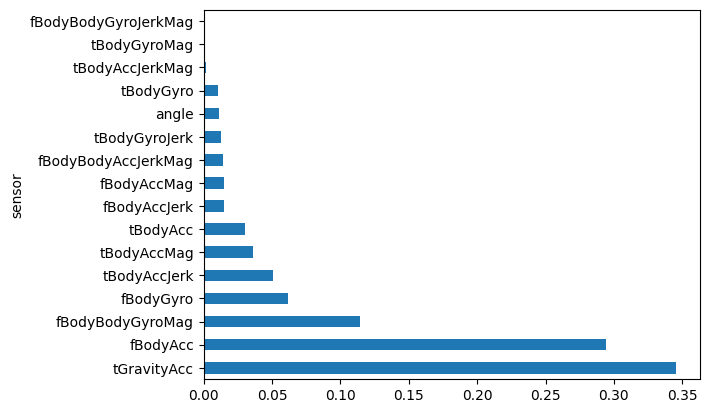

In [166]:
# 센서별 중요도 시각화
# sensor 별 중요도를 수평막대 그래프로 시각화 합니다.
sensor_sort.plot(kind='barh')

### [미션5] 최종결과 저장


In [170]:
result

model_name valid_data  accuracy_score  f1_score
0                   svc      train        0.942776  0.945949
1                    lr      train        0.980170  0.981491
2                   knn      train        0.942776  0.963997
3                   gbc      train        0.980737  0.982430
4                   xgb      train        0.987535  0.988406
5               hpt_xgb      train        0.992068  0.992707
6           hpt_xgb_150      train        0.989235  0.989286
7            hpt_xgb_50      train        0.988102  0.988090
8               hpt_xgb      train        0.992635  0.993037
9      test_hpt_xgb_top       test        0.989123  0.989604
10          all_hpt_xgb       test        0.989574  0.990426
11    all_hpt_depth_xgb       test        0.990481  0.991441
12  walkingup_xgb_model        all        0.998187  0.996335
13  walkingup_xgb_model        all        0.999547  0.999087

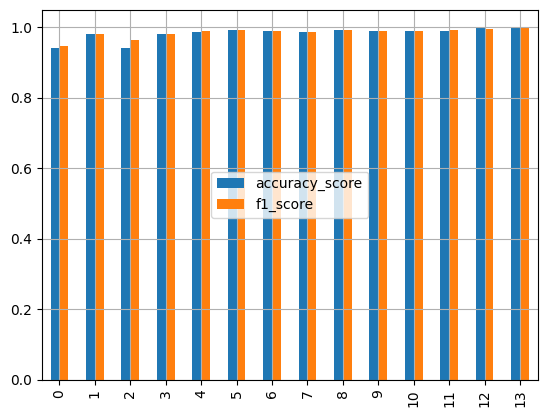

In [171]:
# 최종결과 결과 시각화
# 모델 별 accuracy_score, f1_score 지수를 수직 그래프로 시각화 하세요.

result.plot(kind = 'bar')

plt.legend(loc='center')

plt.grid()

plt.show()


In [173]:
# 최종결과 저장

## 최종 결과(result)를 'final_result.csv' 파일로 저장해 주세요.

## 영향도가 높은 feature 들의 이름을 모아놓은 변수를 'up_importance_top.csv' 파일로 저장해 주세요.

result.to_csv('./data/final_result.csv', index=False)

import os

os.listdir('./data')

['features 설명.xlsx',
 'features.csv',
 'final_result.csv',
 'hpt_xgb_top_model.pkl',
 'importance_top.csv',
 'importance_top.pkl',
 'real_data.csv',
 'result3.csv',
 'result4.csv',
 'result5.csv',
 'test_data.csv',
 'train_data.csv',
 'x_train_top.pkl',
 'y_train.pkl',
 '새 폴더']

In [188]:
sensor_sort.index.to_series().to_csv('up_importance_top.csv', index=False, header=False)

import os

os.listdir('./data')

['features 설명.xlsx',
 'features.csv',
 'final_result.csv',
 'hpt_xgb_top_model.pkl',
 'importance_top.csv',
 'importance_top.pkl',
 'real_data.csv',
 'result3.csv',
 'result4.csv',
 'result5.csv',
 'test_data.csv',
 'train_data.csv',
 'up_importance_top.csv',
 'x_train_top.pkl',
 'y_train.pkl',
 '새 폴더']

In [192]:
pd.read_csv('./data/final_result.csv')

model_name valid_data  accuracy_score  f1_score
0                   svc      train        0.942776  0.945949
1                    lr      train        0.980170  0.981491
2                   knn      train        0.942776  0.963997
3                   gbc      train        0.980737  0.982430
4                   xgb      train        0.987535  0.988406
5               hpt_xgb      train        0.992068  0.992707
6           hpt_xgb_150      train        0.989235  0.989286
7            hpt_xgb_50      train        0.988102  0.988090
8               hpt_xgb      train        0.992635  0.993037
9      test_hpt_xgb_top       test        0.989123  0.989604
10          all_hpt_xgb       test        0.989574  0.990426
11    all_hpt_depth_xgb       test        0.990481  0.991441
12  walkingup_xgb_model        all        0.998187  0.996335
13  walkingup_xgb_model        all        0.999547  0.999087

In [189]:
pd.read_csv('up_importance_top.csv')

tGravityAcc
0               fBodyAcc
1       fBodyBodyGyroMag
2              fBodyGyro
3           tBodyAccJerk
4            tBodyAccMag
5               tBodyAcc
6           fBodyAccJerk
7            fBodyAccMag
8    fBodyBodyAccJerkMag
9          tBodyGyroJerk
10                 angle
11             tBodyGyro
12       tBodyAccJerkMag
13          tBodyGyroMag
14  fBodyBodyGyroJerkMag

----------
----------

### [도전미션1]  'WORKING_UPSTAIRS' 분류에 영향을 미치는 상위 20 agg 찾기

* 앞서 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor'를 찾아보았습니다.
* 도전미션1 에서는 'WORKING_UPSTAIRS' 분류에 가장 영향을 많이 미치는 'agg'(aggrigation) 을 찾아 보겠습니다.

	- 실습순서: 데이터 그룹화 -> 데이터 재정렬 -> Top20 agg 시각화

In [202]:
# 데이터 그룹화

## merge_df 변수를 ['sensor','agg'] 기준으로 그룹화 하면서 'feature_importance' 열의 데이터를 더해 줍니다.

## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 계산을 동시에 수행할 수 있습니다.

merge_df.groupby(by=['sensor','agg'])['feature_importance'].sum()

sensor       agg          
angle        X                0.000000
             Y                0.011100
fBodyAcc     bandsEnergy()    0.248989
             iqr()            0.000000
             kurtosis()       0.000000
                                ...   
tGravityAcc  max()            0.002065
             mean()           0.033240
             min()            0.021969
             sma()            0.003834
             std()            0.000000
Name: feature_importance, Length: 82, dtype: float32

In [204]:
# sensor_agg 중요도 별 데이터 재정렬

## sensor_agg_sum 데이터를 내림차순으로 정렬 후 sensor_agg_sort 변수에 할당합니다.

merge_df.groupby(by=['sensor','agg'])['feature_importance'].sum().sort_values(ascending=False)

sensor            agg          
tGravityAcc       arCoeff()        0.261492
fBodyAcc          bandsEnergy()    0.248989
fBodyBodyGyroMag  std()            0.106188
fBodyAcc          max()            0.040218
tBodyAccMag       std()            0.034784
                                     ...   
tBodyAcc          sma()            0.000000
tBodyAccJerk      entropy()        0.000000
                  min()            0.000000
                  sma()            0.000000
tGravityAcc       std()            0.000000
Name: feature_importance, Length: 82, dtype: float32

<Axes: ylabel='sensor,agg'>

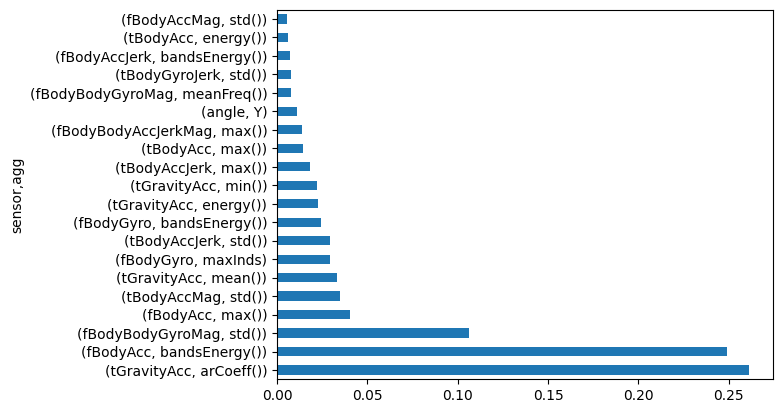

In [254]:
# 중요도 Top20 acc 시각화
## 중요도가 높은 센서 20개의 중요도를 수평 막대그래프로 시각화 합니다.

merge_df.groupby(by=['sensor','agg'])['feature_importance'].sum().sort_values(ascending=False)

top_20_grouped_data = merge_df.groupby(by=['sensor', 'agg'])['feature_importance'].sum().sort_values(ascending=False).head(20)

top_20_grouped_data.plot(kind='barh')

----------
----------

### [도전미션2]  'sensor'를 구성하고있는 'agg' 시각화

* 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor'를 구성하고 있는 'agg'와 각 'sensor' 별 'agg'의 크기를 시각화 해보세요

	- 실습순서: 데이터 재구조화 -> sensor 별 합계 재정렬 -> 재정렬 기준열 제거 ->  누적 막대 그래프 시각화

In [255]:
top_20_grouped_data.unstack()

agg                  arCoeff()  bandsEnergy()     std()     max()   mean()  \
sensor                                                                       
tGravityAcc           0.261492            NaN       NaN       NaN  0.03324   
fBodyAcc                   NaN       0.248989       NaN  0.040218      NaN   
fBodyBodyGyroMag           NaN            NaN  0.106188       NaN      NaN   
tBodyAccMag                NaN            NaN  0.034784       NaN      NaN   
fBodyGyro                  NaN       0.024436       NaN       NaN      NaN   
tBodyAccJerk               NaN            NaN  0.029466  0.018202      NaN   
tBodyAcc                   NaN            NaN       NaN  0.014348      NaN   
fBodyBodyAccJerkMag        NaN            NaN       NaN  0.014087      NaN   
angle                      NaN            NaN       NaN       NaN      NaN   
tBodyGyroJerk              NaN            NaN  0.007888       NaN      NaN   
fBodyAccJerk               NaN       0.007033       NaN       NaN      NaN   
fBodyAccMag                NaN            NaN  0.005654       NaN      NaN   

agg                   maxInds  energy()     min()       Y  meanFreq()  
sensor                                                                 
tGravityAcc               NaN  0.022832  0.021969     NaN         NaN  
fBodyAcc                  NaN       NaN       NaN     NaN         NaN  
fBodyBodyGyroMag          NaN       NaN       NaN     NaN    0.007991  
tBodyAccMag               NaN       NaN       NaN     NaN         NaN  
fBodyGyro            0.029525       NaN       NaN     NaN         NaN  
tBodyAccJerk              NaN       NaN       NaN     NaN         NaN  
tBodyAcc                  NaN  0.006275       NaN     NaN         NaN  
fBodyBodyAccJerkMag       NaN       NaN       NaN     NaN         NaN  
angle                     NaN       NaN       NaN  0.0111         NaN  
tBodyGyroJerk             NaN       NaN       NaN     NaN         NaN  
fBodyAccJerk              NaN       NaN       NaN     NaN         NaN  
fBodyAccMag               NaN       NaN       NaN     NaN         NaN

In [256]:
# sensor_agg_sort 데이터 재 구조화

# sensor_agg_sort 데이터의 'agg'열의 고유값을 sensor_agg_sort 데이터의 컬럼으로 변환(재구조화) 합니다. 

# 재구조화 한 데이터를 acc 변수에 할당 합니다.

# 참고함수: unstack()

acc = top_20_grouped_data.unstack()

acc

agg                  arCoeff()  bandsEnergy()     std()     max()   mean()  \
sensor                                                                       
tGravityAcc           0.261492            NaN       NaN       NaN  0.03324   
fBodyAcc                   NaN       0.248989       NaN  0.040218      NaN   
fBodyBodyGyroMag           NaN            NaN  0.106188       NaN      NaN   
tBodyAccMag                NaN            NaN  0.034784       NaN      NaN   
fBodyGyro                  NaN       0.024436       NaN       NaN      NaN   
tBodyAccJerk               NaN            NaN  0.029466  0.018202      NaN   
tBodyAcc                   NaN            NaN       NaN  0.014348      NaN   
fBodyBodyAccJerkMag        NaN            NaN       NaN  0.014087      NaN   
angle                      NaN            NaN       NaN       NaN      NaN   
tBodyGyroJerk              NaN            NaN  0.007888       NaN      NaN   
fBodyAccJerk               NaN       0.007033       NaN       NaN      NaN   
fBodyAccMag                NaN            NaN  0.005654       NaN      NaN   

agg                   maxInds  energy()     min()       Y  meanFreq()  
sensor                                                                 
tGravityAcc               NaN  0.022832  0.021969     NaN         NaN  
fBodyAcc                  NaN       NaN       NaN     NaN         NaN  
fBodyBodyGyroMag          NaN       NaN       NaN     NaN    0.007991  
tBodyAccMag               NaN       NaN       NaN     NaN         NaN  
fBodyGyro            0.029525       NaN       NaN     NaN         NaN  
tBodyAccJerk              NaN       NaN       NaN     NaN         NaN  
tBodyAcc                  NaN  0.006275       NaN     NaN         NaN  
fBodyBodyAccJerkMag       NaN       NaN       NaN     NaN         NaN  
angle                     NaN       NaN       NaN  0.0111         NaN  
tBodyGyroJerk             NaN       NaN       NaN     NaN         NaN  
fBodyAccJerk              NaN       NaN       NaN     NaN         NaN  
fBodyAccMag               NaN       NaN       NaN     NaN         NaN

In [257]:
# 센서별 합계 재정렬
## acc 데이터의 각 센서의 행 기준(axis=1) 모든 값을 더해서 acc['sort'] 에 할당 합니다.
## 할당 후 acc 데이터를 acc['sort'] 열의 값 기준으로 내림차순으로 정렬 합니다.
## 정렬 후 데이터를 확인 합니다.

acc['sort'] = acc.sum(axis=1)
acc

agg                  arCoeff()  bandsEnergy()     std()     max()   mean()  \
sensor                                                                       
tGravityAcc           0.261492            NaN       NaN       NaN  0.03324   
fBodyAcc                   NaN       0.248989       NaN  0.040218      NaN   
fBodyBodyGyroMag           NaN            NaN  0.106188       NaN      NaN   
tBodyAccMag                NaN            NaN  0.034784       NaN      NaN   
fBodyGyro                  NaN       0.024436       NaN       NaN      NaN   
tBodyAccJerk               NaN            NaN  0.029466  0.018202      NaN   
tBodyAcc                   NaN            NaN       NaN  0.014348      NaN   
fBodyBodyAccJerkMag        NaN            NaN       NaN  0.014087      NaN   
angle                      NaN            NaN       NaN       NaN      NaN   
tBodyGyroJerk              NaN            NaN  0.007888       NaN      NaN   
fBodyAccJerk               NaN       0.007033       NaN       NaN      NaN   
fBodyAccMag                NaN            NaN  0.005654       NaN      NaN   

agg                   maxInds  energy()     min()       Y  meanFreq()  \
sensor                                                                  
tGravityAcc               NaN  0.022832  0.021969     NaN         NaN   
fBodyAcc                  NaN       NaN       NaN     NaN         NaN   
fBodyBodyGyroMag          NaN       NaN       NaN     NaN    0.007991   
tBodyAccMag               NaN       NaN       NaN     NaN         NaN   
fBodyGyro            0.029525       NaN       NaN     NaN         NaN   
tBodyAccJerk              NaN       NaN       NaN     NaN         NaN   
tBodyAcc                  NaN  0.006275       NaN     NaN         NaN   
fBodyBodyAccJerkMag       NaN       NaN       NaN     NaN         NaN   
angle                     NaN       NaN       NaN  0.0111         NaN   
tBodyGyroJerk             NaN       NaN       NaN     NaN         NaN   
fBodyAccJerk              NaN       NaN       NaN     NaN         NaN   
fBodyAccMag               NaN       NaN       NaN     NaN         NaN   

agg                      sort  
sensor                         
tGravityAcc          0.339534  
fBodyAcc             0.289208  
fBodyBodyGyroMag     0.114178  
tBodyAccMag          0.034784  
fBodyGyro            0.053961  
tBodyAccJerk         0.047668  
tBodyAcc             0.020623  
fBodyBodyAccJerkMag  0.014087  
angle                0.011100  
tBodyGyroJerk        0.007888  
fBodyAccJerk         0.007033  
fBodyAccMag          0.005654

In [259]:
acc.sort_values(by='sort', ascending=False,inplace=True)

In [261]:
acc

agg                  arCoeff()  bandsEnergy()     std()     max()   mean()  \
sensor                                                                       
tGravityAcc           0.261492            NaN       NaN       NaN  0.03324   
fBodyAcc                   NaN       0.248989       NaN  0.040218      NaN   
fBodyBodyGyroMag           NaN            NaN  0.106188       NaN      NaN   
fBodyGyro                  NaN       0.024436       NaN       NaN      NaN   
tBodyAccJerk               NaN            NaN  0.029466  0.018202      NaN   
tBodyAccMag                NaN            NaN  0.034784       NaN      NaN   
tBodyAcc                   NaN            NaN       NaN  0.014348      NaN   
fBodyBodyAccJerkMag        NaN            NaN       NaN  0.014087      NaN   
angle                      NaN            NaN       NaN       NaN      NaN   
tBodyGyroJerk              NaN            NaN  0.007888       NaN      NaN   
fBodyAccJerk               NaN       0.007033       NaN       NaN      NaN   
fBodyAccMag                NaN            NaN  0.005654       NaN      NaN   

agg                   maxInds  energy()     min()       Y  meanFreq()  \
sensor                                                                  
tGravityAcc               NaN  0.022832  0.021969     NaN         NaN   
fBodyAcc                  NaN       NaN       NaN     NaN         NaN   
fBodyBodyGyroMag          NaN       NaN       NaN     NaN    0.007991   
fBodyGyro            0.029525       NaN       NaN     NaN         NaN   
tBodyAccJerk              NaN       NaN       NaN     NaN         NaN   
tBodyAccMag               NaN       NaN       NaN     NaN         NaN   
tBodyAcc                  NaN  0.006275       NaN     NaN         NaN   
fBodyBodyAccJerkMag       NaN       NaN       NaN     NaN         NaN   
angle                     NaN       NaN       NaN  0.0111         NaN   
tBodyGyroJerk             NaN       NaN       NaN     NaN         NaN   
fBodyAccJerk              NaN       NaN       NaN     NaN         NaN   
fBodyAccMag               NaN       NaN       NaN     NaN         NaN   

agg                      sort  
sensor                         
tGravityAcc          0.339534  
fBodyAcc             0.289208  
fBodyBodyGyroMag     0.114178  
fBodyGyro            0.053961  
tBodyAccJerk         0.047668  
tBodyAccMag          0.034784  
tBodyAcc             0.020623  
fBodyBodyAccJerkMag  0.014087  
angle                0.011100  
tBodyGyroJerk        0.007888  
fBodyAccJerk         0.007033  
fBodyAccMag          0.005654

In [262]:
# 정렬 기준열 제거
# 센서별 정렬을 완료 했으므로 acc 변수에서 acc['sort']열을 삭제 합니다.
acc.drop('sort', axis=1, inplace = True)
acc

agg                  arCoeff()  bandsEnergy()     std()     max()   mean()  \
sensor                                                                       
tGravityAcc           0.261492            NaN       NaN       NaN  0.03324   
fBodyAcc                   NaN       0.248989       NaN  0.040218      NaN   
fBodyBodyGyroMag           NaN            NaN  0.106188       NaN      NaN   
fBodyGyro                  NaN       0.024436       NaN       NaN      NaN   
tBodyAccJerk               NaN            NaN  0.029466  0.018202      NaN   
tBodyAccMag                NaN            NaN  0.034784       NaN      NaN   
tBodyAcc                   NaN            NaN       NaN  0.014348      NaN   
fBodyBodyAccJerkMag        NaN            NaN       NaN  0.014087      NaN   
angle                      NaN            NaN       NaN       NaN      NaN   
tBodyGyroJerk              NaN            NaN  0.007888       NaN      NaN   
fBodyAccJerk               NaN       0.007033       NaN       NaN      NaN   
fBodyAccMag                NaN            NaN  0.005654       NaN      NaN   

agg                   maxInds  energy()     min()       Y  meanFreq()  
sensor                                                                 
tGravityAcc               NaN  0.022832  0.021969     NaN         NaN  
fBodyAcc                  NaN       NaN       NaN     NaN         NaN  
fBodyBodyGyroMag          NaN       NaN       NaN     NaN    0.007991  
fBodyGyro            0.029525       NaN       NaN     NaN         NaN  
tBodyAccJerk              NaN       NaN       NaN     NaN         NaN  
tBodyAccMag               NaN       NaN       NaN     NaN         NaN  
tBodyAcc                  NaN  0.006275       NaN     NaN         NaN  
fBodyBodyAccJerkMag       NaN       NaN       NaN     NaN         NaN  
angle                     NaN       NaN       NaN  0.0111         NaN  
tBodyGyroJerk             NaN       NaN       NaN     NaN         NaN  
fBodyAccJerk              NaN       NaN       NaN     NaN         NaN  
fBodyAccMag               NaN       NaN       NaN     NaN         NaN

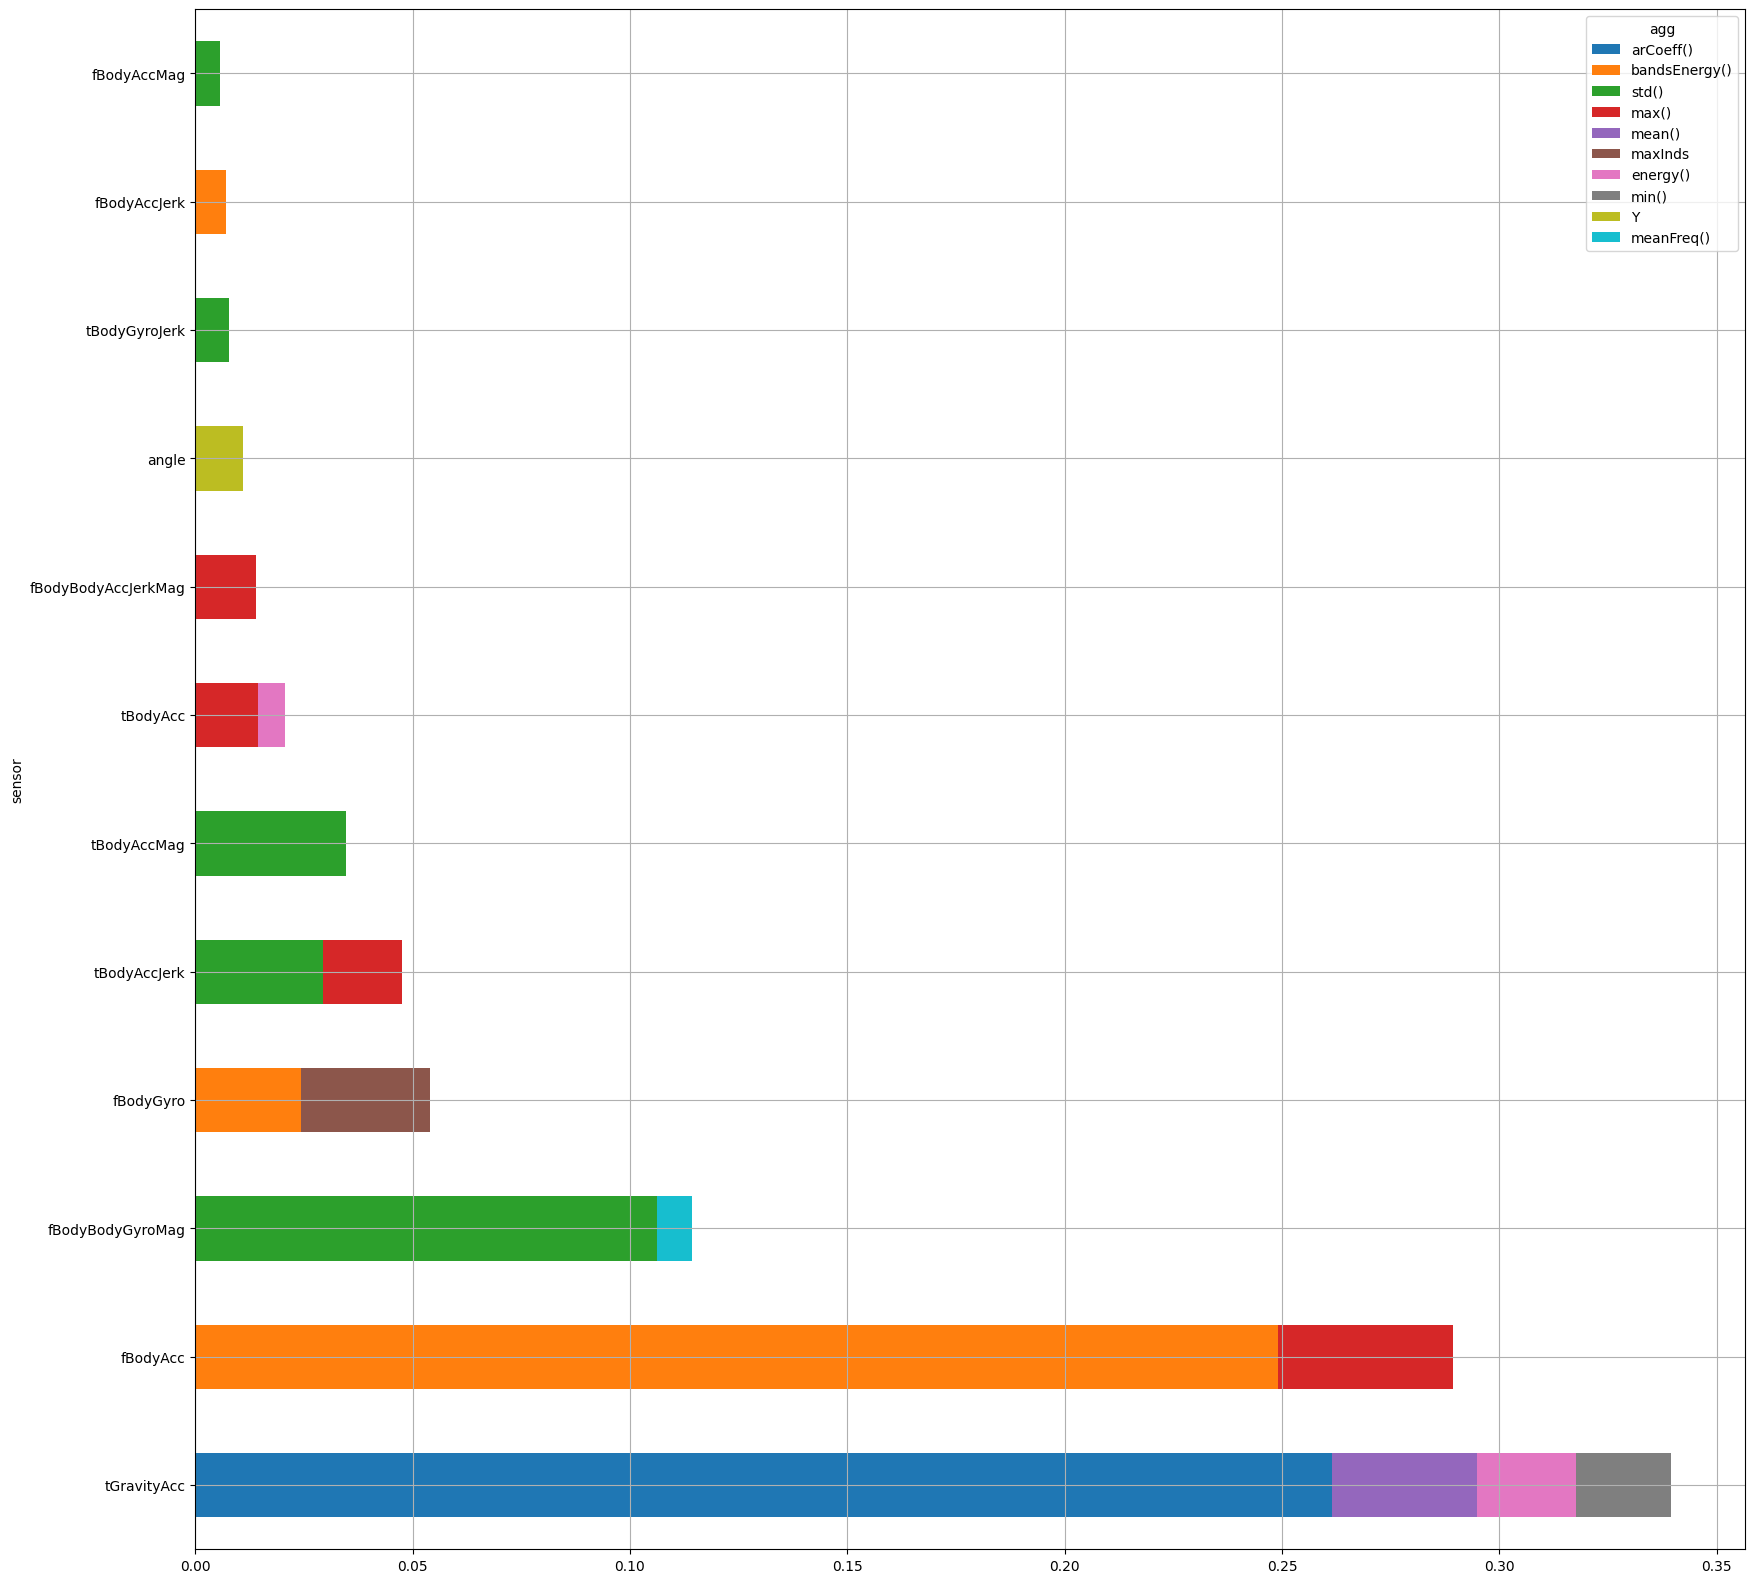

In [263]:
# 누적 막대 그래프 시각화
# acc 변수를 sensor 별 수평 그래프로 시각화 합니다.

acc.plot(kind='barh' , stacked= True, figsize= (20,20) )
plt.grid()
plt.show()

---
---

## <실전미션> Activity 예측하기


* 단말기 개발팀에서 최근에 Fine-Watch에서 수집한 real 데이터를 보내 주었습니다. 이 데이터에는 Activity 정보가 없습니다. 어느 'subject' 열이 'WALKING_UPSTAIRS' 데이터인지 Activity를 분류해서 결과를 단말기 개발팀 메일에 함께 보내 주세요.

In [269]:
# real_data.csv 파일을 불러와서 real_data 변수에 할당 합니다.
# 잘 할당 되었는지 데이터 확인

real_data = pd.read_csv('./data/real_data.csv')
real_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0            0.064073          -0.005123          -0.271555         -0.231952   
1           -0.239103          -0.096904           0.148035         -0.637325   
2           -0.181394           0.324130           0.129390         -0.867258   
3           -0.166426          -0.119353           0.133035         -0.633135   
4           -0.161088          -0.028160          -0.209931          0.817104   
5           -0.107530           0.013312           1.000000         -0.835146   
6            0.058595          -0.050059          -0.167108         -0.223698   
7            0.062631          -0.062839          -0.334600         -0.170677   
8            0.069324          -0.007338          -0.161523         -0.090053   
9           -0.466440          -0.618098           0.948795         -0.789764   
10           0.187920          -0.022493          -0.114320         -0.285203   
11           0.182161          -0.102774          -0.051900         -0.559489   
12           0.182248          -0.003642          -0.117918         -0.177727   
13           0.182742          -0.039118          -0.117717         -0.137577   
14           0.267329          -0.040259          -0.136907         -0.983065   
15           0.183081          -0.019833          -0.083086         -0.188434   
16           0.183580          -0.127213          -0.053418          0.066369   
17          -0.105130           0.164599           0.118295         -0.749612   
18          -0.179028          -0.202258           0.185416         -0.783216   
19           0.183590          -0.020858          -0.052464         -0.411774   
20           0.184030          -0.044246          -0.088211          0.244604   
21           0.291894          -0.017392          -0.103893         -0.988748   
22           0.275280          -0.018206          -0.107405         -0.994815   
23           0.278354          -0.019952          -0.104224         -0.997236   
24           0.276759          -0.018366          -0.108147         -0.997715   
25           0.247617          -0.025411          -0.098561         -0.985436   
26          -0.088994           0.270256           0.167615         -0.840510   
27           0.267601          -0.032814          -0.113073         -0.290751   
28           0.143609           0.002423          -0.119384          0.199690   
29          -0.088994           0.270256           0.167615         -0.840510   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0           0.593444          0.833666         -0.293844          0.603777   
1          -0.127692         -0.258924         -0.643642         -0.138551   
2          -0.581496         -0.777242         -0.885160         -0.575035   
3          -0.189775         -0.319336         -0.623804         -0.199675   
4           0.873037          0.127390          0.734566          0.845695   
5          -0.600036         -0.356636         -0.836418         -0.550924   
6           0.110078         -0.094274         -0.248771          0.062721   
7          -0.365133          0.099516         -0.210948         -0.404148   
8           0.000301          0.243752         -0.232309         -0.026293   
9          -0.057348         -0.352774         -0.803030          0.063835   
10         -0.001438          0.163397         -0.339592         -0.134192   
11         -0.147033         -0.121907         -0.590843         -0.172949   
12          0.255495         -0.202426         -0.201770          0.173233   
13          0.383998         -0.118934         -0.259374          0.200017   
14         -0.895485         -0.897036         -0.985633         -0.904548   
15         -0.067420         -0.269903         -0.225564         -0.048627   
16          0.175940         -0.392213          0.024724          0.176251   
17         -0.505275         -0.641253         -0.759818         -0.458225   
18        

In [270]:
## real_data 변수(데이터셋)에서 행동분류에 불필요한 'subject'열 제거한 데이터를 real_x_val 변수에 할당 합니다.
## 나중에 예측 결과를 real_data 데이터 프레임에 병합해서 결과를 확인해야 하므로 real_data 변수에서 'subject'열 제거하지 마세요.

real_x_val = real_data.drop('subject', axis=1)
real_x_val

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0            0.064073          -0.005123          -0.271555         -0.231952   
1           -0.239103          -0.096904           0.148035         -0.637325   
2           -0.181394           0.324130           0.129390         -0.867258   
3           -0.166426          -0.119353           0.133035         -0.633135   
4           -0.161088          -0.028160          -0.209931          0.817104   
5           -0.107530           0.013312           1.000000         -0.835146   
6            0.058595          -0.050059          -0.167108         -0.223698   
7            0.062631          -0.062839          -0.334600         -0.170677   
8            0.069324          -0.007338          -0.161523         -0.090053   
9           -0.466440          -0.618098           0.948795         -0.789764   
10           0.187920          -0.022493          -0.114320         -0.285203   
11           0.182161          -0.102774          -0.051900         -0.559489   
12           0.182248          -0.003642          -0.117918         -0.177727   
13           0.182742          -0.039118          -0.117717         -0.137577   
14           0.267329          -0.040259          -0.136907         -0.983065   
15           0.183081          -0.019833          -0.083086         -0.188434   
16           0.183580          -0.127213          -0.053418          0.066369   
17          -0.105130           0.164599           0.118295         -0.749612   
18          -0.179028          -0.202258           0.185416         -0.783216   
19           0.183590          -0.020858          -0.052464         -0.411774   
20           0.184030          -0.044246          -0.088211          0.244604   
21           0.291894          -0.017392          -0.103893         -0.988748   
22           0.275280          -0.018206          -0.107405         -0.994815   
23           0.278354          -0.019952          -0.104224         -0.997236   
24           0.276759          -0.018366          -0.108147         -0.997715   
25           0.247617          -0.025411          -0.098561         -0.985436   
26          -0.088994           0.270256           0.167615         -0.840510   
27           0.267601          -0.032814          -0.113073         -0.290751   
28           0.143609           0.002423          -0.119384          0.199690   
29          -0.088994           0.270256           0.167615         -0.840510   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0           0.593444          0.833666         -0.293844          0.603777   
1          -0.127692         -0.258924         -0.643642         -0.138551   
2          -0.581496         -0.777242         -0.885160         -0.575035   
3          -0.189775         -0.319336         -0.623804         -0.199675   
4           0.873037          0.127390          0.734566          0.845695   
5          -0.600036         -0.356636         -0.836418         -0.550924   
6           0.110078         -0.094274         -0.248771          0.062721   
7          -0.365133          0.099516         -0.210948         -0.404148   
8           0.000301          0.243752         -0.232309         -0.026293   
9          -0.057348         -0.352774         -0.803030          0.063835   
10         -0.001438          0.163397         -0.339592         -0.134192   
11         -0.147033         -0.121907         -0.590843         -0.172949   
12          0.255495         -0.202426         -0.201770          0.173233   
13          0.383998         -0.118934         -0.259374          0.200017   
14         -0.895485         -0.897036         -0.985633         -0.904548   
15         -0.067420         -0.269903         -0.225564         -0.048627   
16          0.175940         -0.392213          0.024724          0.176251   
17         -0.505275         -0.641253         -0.759818         -0.458225   
18        

In [284]:
x_val_top

fBodyAcc-bandsEnergy()-1,8.2  fBodyBodyGyroMag-std()  \
1167                     -0.999776               -0.981321   
4533                     -0.586330               -0.167188   
1146                     -0.998767               -0.963197   
3201                     -0.892949               -0.590718   
6263                     -0.858608               -0.637589   
...                            ...                     ...   
3979                     -0.998630               -0.970146   
6536                     -0.995760               -0.954668   
4801                     -0.906349               -0.643232   
2284                     -0.622168               -0.450204   
894                      -0.998186               -0.806200   

      tGravityAcc-arCoeff()-Z,2  tGravityAcc-arCoeff()-Z,1  tBodyAccMag-std()  \
1167                   0.441821                  -0.441830          -0.995567   
4533                   0.541519                  -0.507055          -0.292568   
1146                  -0.404116                   0.396709          -0.940157   
3201                  -0.118768                   0.194729          -0.417137   
6263                   0.080080                   0.000326          -0.386105   
...                         ...                        ...                ...   
3979                   0.550056                  -0.548397          -0.977566   
6536                   0.741137                  -0.735497          -0.971510   
4801                  -0.134367                   0.208691          -0.432702   
2284                   0.900347                  -0.885113          -0.298528   
894                    0.398406                  -0.391351          -0.938155   

      tGravityAcc-arCoeff()-Y,1  fBodyAcc-bandsEnergy()-1,8  \
1167                  -0.581698                   -0.999991   
4533                  -0.231096                   -0.758850   
1146                   0.026871                   -0.999842   
3201                  -0.324297                   -0.751827   
6263                  -0.158004                   -0.795979   
...                         ...                         ...   
3979                  -0.334687                   -0.999946   
6536                  -0.474097                   -0.999958   
4801                   0.224423                   -0.859064   
2284                  -0.636582                   -0.600535   
894                   -0.290538                   -0.999263   

      fBodyGyro-maxInds-Z  tBodyAccJerk-std()-Z  fBodyAcc-max()-X  ...  \
1167            -0.931034             -0.992822         -0.998737  ...   
4533            -0.586207             -0.422063         -0.448811  ...   
1146            -1.000000             -0.956794         -0.988095  ...   
3201            -0.586207             -0.274443         -0.447300  ...   
6263            -0.655172             -0.356149         -0.397746  ...   
...                   ...                   ...               ...  ...   
3979            -1.000000             -0.984278         -0.995564  ...   
6536            -1.000000             -0.985266         -0.995340  ...   
4801            -0.655172             -0.305189         -0.515098  ...   
2284            -0.793103             -0.775347         -0.164239  ...   
894             -0.931034             -0.958807         -0.980667  ...   

      fBodyAcc-bandsEnergy()-9,16.1  tBodyAccJerk-iqr()-Z  \
1167                      -0.999808             -0.993642   
4533                      -0.511459             -0.466939   
1146                      -0.998331             -0.983597   
3201                      -0.803282             -0.199136   
6263                      -0.805823             -0.487114   
...                             ...                   ...   
3979                      -0.999624             -0.978959   
6536                      -0.999697             -0.976776   
4801                      -0.735503             -0.180986   
2284                      -0.889

In [282]:
## real_x_val 데이터에서 최고의 성능을 내는 학습 feature 데이터를 real_x_top 변수에 할당합니다.
## Feature Selection 된 상위 중요 feature 명 리스트는 up_importance_top 변수를 사용 합니다.

real_x_top = pd.read_csv('up_importance_top.csv')
real_x_top = real_x_top.squeeze

In [283]:
## walkingup_top 모델로 real_x_top 데이터의 'WALKING_UPSTAIRS' 행동분류 예측해서 real_walkingup_pred 변수에 할당 합니다.

walkingup_top_model.predict(real_x_top)


C:\Users\user\anaconda3\Lib\site-packages\xgboost\data.py:1017: UserWarning: Unknown data type: <class 'method'>, trying to convert it to csr_matrix
  warnings.warn(


TypeError: Not supported type for data.<class 'method'>

In [51]:
## real_data['WALKING_UPSTAIRS'] 열에 real_walkingup_pred 예측 결과를 할당 하고, 데이터를 확인 합니다.



tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0            0.064073          -0.005123          -0.271555         -0.231952   
1           -0.239103          -0.096904           0.148035         -0.637325   
2           -0.181394           0.324130           0.129390         -0.867258   
3           -0.166426          -0.119353           0.133035         -0.633135   
4           -0.161088          -0.028160          -0.209931          0.817104   
5           -0.107530           0.013312           1.000000         -0.835146   
6            0.058595          -0.050059          -0.167108         -0.223698   
7            0.062631          -0.062839          -0.334600         -0.170677   
8            0.069324          -0.007338          -0.161523         -0.090053   
9           -0.466440          -0.618098           0.948795         -0.789764   
10           0.187920          -0.022493          -0.114320         -0.285203   
11           0.182161          -0.102774          -0.051900         -0.559489   
12           0.182248          -0.003642          -0.117918         -0.177727   
13           0.182742          -0.039118          -0.117717         -0.137577   
14           0.267329          -0.040259          -0.136907         -0.983065   
15           0.183081          -0.019833          -0.083086         -0.188434   
16           0.183580          -0.127213          -0.053418          0.066369   
17          -0.105130           0.164599           0.118295         -0.749612   
18          -0.179028          -0.202258           0.185416         -0.783216   
19           0.183590          -0.020858          -0.052464         -0.411774   
20           0.184030          -0.044246          -0.088211          0.244604   
21           0.291894          -0.017392          -0.103893         -0.988748   
22           0.275280          -0.018206          -0.107405         -0.994815   
23           0.278354          -0.019952          -0.104224         -0.997236   
24           0.276759          -0.018366          -0.108147         -0.997715   
25           0.247617          -0.025411          -0.098561         -0.985436   
26          -0.088994           0.270256           0.167615         -0.840510   
27           0.267601          -0.032814          -0.113073         -0.290751   
28           0.143609           0.002423          -0.119384          0.199690   
29          -0.088994           0.270256           0.167615         -0.840510   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0           0.593444          0.833666         -0.293844          0.603777   
1          -0.127692         -0.258924         -0.643642         -0.138551   
2          -0.581496         -0.777242         -0.885160         -0.575035   
3          -0.189775         -0.319336         -0.623804         -0.199675   
4           0.873037          0.127390          0.734566          0.845695   
5          -0.600036         -0.356636         -0.836418         -0.550924   
6           0.110078         -0.094274         -0.248771          0.062721   
7          -0.365133          0.099516         -0.210948         -0.404148   
8           0.000301          0.243752         -0.232309         -0.026293   
9          -0.057348         -0.352774         -0.803030          0.063835   
10         -0.001438          0.163397         -0.339592         -0.134192   
11         -0.147033         -0.121907         -0.590843         -0.172949   
12          0.255495         -0.202426         -0.201770          0.173233   
13          0.383998         -0.118934         -0.259374          0.200017   
14         -0.895485         -0.897036         -0.985633         -0.904548   
15         -0.067420         -0.269903         -0.225564         -0.048627   
16          0.175940         -0.392213          0.024724          0.176251   
17         -0.505275         -0.641253         -0.759818         -0.458225   
18        

In [52]:
# 인덱스 미포함 real_data 변수를 real_result.csv 파일로 저장 합니다.




In [53]:
# 잘 저장 되었는지 확인 합니다.



tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0            0.064073          -0.005123          -0.271555         -0.231952   
1           -0.239103          -0.096904           0.148035         -0.637325   
2           -0.181394           0.324130           0.129390         -0.867258   
3           -0.166426          -0.119353           0.133035         -0.633135   
4           -0.161088          -0.028160          -0.209931          0.817104   
5           -0.107530           0.013312           1.000000         -0.835146   
6            0.058595          -0.050059          -0.167108         -0.223698   
7            0.062631          -0.062839          -0.334600         -0.170677   
8            0.069324          -0.007338          -0.161523         -0.090053   
9           -0.466440          -0.618098           0.948795         -0.789764   
10           0.187920          -0.022493          -0.114320         -0.285203   
11           0.182161          -0.102774          -0.051900         -0.559489   
12           0.182248          -0.003642          -0.117918         -0.177727   
13           0.182742          -0.039118          -0.117717         -0.137577   
14           0.267329          -0.040259          -0.136907         -0.983065   
15           0.183081          -0.019833          -0.083086         -0.188434   
16           0.183580          -0.127213          -0.053418          0.066369   
17          -0.105130           0.164599           0.118295         -0.749612   
18          -0.179028          -0.202258           0.185416         -0.783216   
19           0.183590          -0.020858          -0.052464         -0.411774   
20           0.184030          -0.044246          -0.088211          0.244604   
21           0.291894          -0.017392          -0.103893         -0.988748   
22           0.275280          -0.018206          -0.107405         -0.994815   
23           0.278354          -0.019952          -0.104224         -0.997236   
24           0.276759          -0.018366          -0.108147         -0.997715   
25           0.247617          -0.025411          -0.098561         -0.985436   
26          -0.088994           0.270256           0.167615         -0.840510   
27           0.267601          -0.032814          -0.113073         -0.290751   
28           0.143609           0.002423          -0.119384          0.199690   
29          -0.088994           0.270256           0.167615         -0.840510   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0           0.593444          0.833666         -0.293844          0.603777   
1          -0.127692         -0.258924         -0.643642         -0.138551   
2          -0.581496         -0.777242         -0.885160         -0.575035   
3          -0.189775         -0.319336         -0.623804         -0.199675   
4           0.873037          0.127390          0.734566          0.845695   
5          -0.600036         -0.356636         -0.836418         -0.550924   
6           0.110078         -0.094274         -0.248771          0.062721   
7          -0.365133          0.099516         -0.210948         -0.404148   
8           0.000301          0.243752         -0.232309         -0.026293   
9          -0.057348         -0.352774         -0.803030          0.063835   
10         -0.001438          0.163397         -0.339592         -0.134192   
11         -0.147033         -0.121907         -0.590843         -0.172949   
12          0.255495         -0.202426         -0.201770          0.173233   
13          0.383998         -0.118934         -0.259374          0.200017   
14         -0.895485         -0.897036         -0.985633         -0.904548   
15         -0.067420         -0.269903         -0.225564         -0.048627   
16          0.175940         -0.392213          0.024724          0.176251   
17         -0.505275         -0.641253         -0.759818         -0.458225   
18        

---
---

### [파이널 미션] 결과 메일 발송

* 수신자: aivleschool.dx@gmail.com

----------

# 수고하셨습니다

----------